In [70]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
num_classes = 10

In [79]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

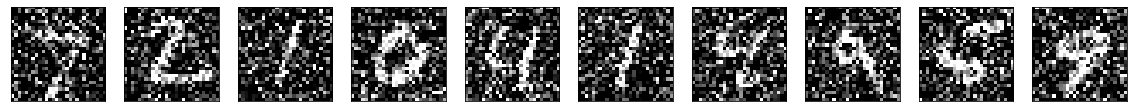

In [4]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [10]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 169us/step - loss: 0.1770 - val_loss: 0.1290
Epoch 2/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1201 - val_loss: 0.1149
Epoch 3/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1125 - val_loss: 0.1072
Epoch 4/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1086 - val_loss: 0.1092
Epoch 5/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1062 - val_loss: 0.1029
Epoch 6/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1046 - val_loss: 0.1021
Epoch 7/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1035 - val_loss: 0.1020
Epoch 8/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1026 - val_loss: 0.1006
Epoch 9/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1016 - val

60000/60000 [==============================] - 6s 102us/step - loss: 0.0945 - val_loss: 0.0959
Epoch 77/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0945 - val_loss: 0.0940
Epoch 78/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0945 - val_loss: 0.0940
Epoch 79/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0944 - val_loss: 0.0938
Epoch 80/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0945 - val_loss: 0.0938
Epoch 81/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0944 - val_loss: 0.0941
Epoch 82/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0944 - val_loss: 0.0949
Epoch 83/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.0945 - val_loss: 0.0949
Epoch 84/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.0943 - val_loss: 0.0937
Epoch 85/100
60000/60000 [===============

In [43]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0   

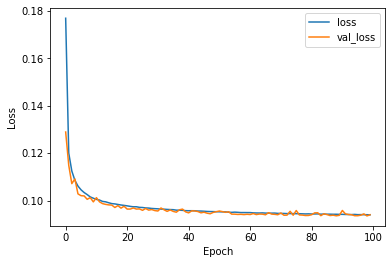

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [13]:
x_tested = autoencoder.predict(x_test_noisy)

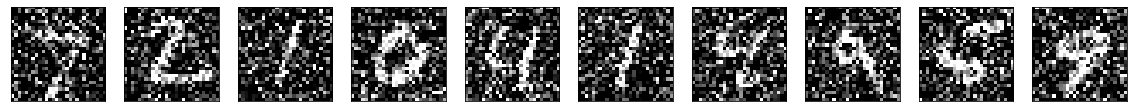

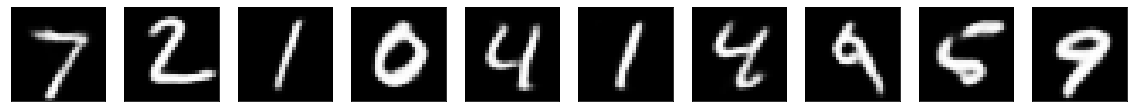

In [14]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_tested[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
autoencoder.save_weights('autoencoder.h5')

In [16]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [17]:
print(y_train[0])
print(y_train_one_hot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
############ Classification Model ####################
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
flat = Flatten()(encoded)
den = Dense(128, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(den)

In [21]:
classification_model = Model(input_img, out)

In [33]:
for l1,l2 in zip(classification_model.layers[:5], autoencoder.layers[:5]):
    l1.set_weights(l2.get_weights())

In [84]:
for layer in classification_model.layers[:5]:## keeping encoding layers with already trained weights
    layer.trainable = False

In [50]:
X_train,X_val,y_train,y_val = train_test_split(x_train_noisy,y_train_one_hot,test_size=0.33,random_state=42)

In [51]:
classification_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
classification_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2008

In [52]:
## training only the full connected layers #######
history_2 = classification_model.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))

Train on 40200 samples, validate on 19800 samples
Epoch 1/50
40200/40200 [==============================] - 6s 148us/step - loss: 0.3153 - accuracy: 0.9031 - val_loss: 0.2412 - val_accuracy: 0.9223
Epoch 2/50
40200/40200 [==============================] - 6s 147us/step - loss: 0.1687 - accuracy: 0.9461 - val_loss: 0.1589 - val_accuracy: 0.9484
Epoch 3/50
40200/40200 [==============================] - 4s 110us/step - loss: 0.1380 - accuracy: 0.9548 - val_loss: 0.1600 - val_accuracy: 0.9490
Epoch 4/50
40200/40200 [==============================] - 5s 115us/step - loss: 0.1160 - accuracy: 0.9621 - val_loss: 0.1446 - val_accuracy: 0.9546
Epoch 5/50
40200/40200 [==============================] - 5s 124us/step - loss: 0.1031 - accuracy: 0.9659 - val_loss: 0.1477 - val_accuracy: 0.9512
Epoch 6/50
40200/40200 [==============================] - 5s 122us/step - loss: 0.0878 - accuracy: 0.9703 - val_loss: 0.1551 - val_accuracy: 0.9529
Epoch 7/50
40200/40200 [==============================] - 5s 1

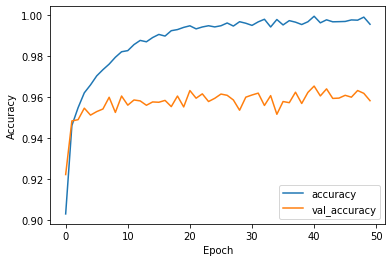

In [55]:
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [57]:
y_predicted_noisy = classification_model.predict(x_test_noisy)

In [81]:
y_predicted = classification_model.predict(x_test)

In [59]:
predicted_classes = np.argmax(np.round(y_predicted_noisy),axis=1)

In [71]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.95      0.98      0.96       982
           5       0.97      0.94      0.96       892
           6       0.98      0.97      0.98       958
           7       0.98      0.92      0.95      1028
           8       0.96      0.94      0.95       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



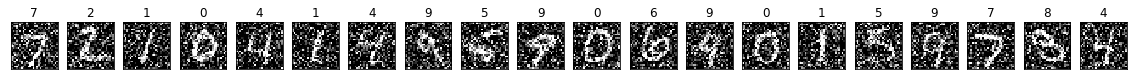

In [83]:
n = 20
plt.figure(figsize=(20, 2))
for i in range(20):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    plt.title(predicted_classes[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()